<div class="alert alert-block alert-info">
<ul>
<li>Course: Machine Learning</li>
<li>Project: 01</li>
<li>Team members</li>
<li>Mauro Travieso Pena</li>
<li>Quoc Huy Luong</li>
<li>Ngoc Bao Tran</li>
<ul>
</div>



# Classification with Decision Tree

<div class="alert alert-block alert-info">
Some comments here 
</div>


# Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import import_ipynb 
import functions as myLib
import myPlot as myPlotLib



importing Jupyter notebook from functions.ipynb
importing Jupyter notebook from myPlot.ipynb


# Load data from files

In [2]:
RawData = pd.read_csv('../data/anime.csv')


#### Clean and Transform Data

In [3]:
Cleaned_Data = myLib.myCleanAndTransformData(RawData)
Y_Data = Cleaned_Data['Class']
X_Data = Cleaned_Data.drop(columns=['Class'])


#### Normalize  Data

In [4]:
Normalized_Data = myLib.myNormalize(X_Data)

#### PCA

In [5]:
n_components=10
PCA_Data = myLib.myPCA(Normalized_Data,n_components)
PCA_Data.head()


,0,1,2,3,4,5,6,7,8,9
0,-0.311566,0.786506,-0.420811,0.005474,-0.078148,-0.047244,-0.063187,0.008051,-0.075596,-0.034086
1,-0.284841,0.763993,-0.412021,-0.011065,-0.110523,-0.089965,-0.094308,0.065784,-0.171760,-0.097921
2,-0.284837,0.767914,-0.395585,-0.007995,-0.092459,-0.062923,-0.054410,0.047826,-0.076465,-0.046485
3,-0.291600,0.777174,-0.408290,0.000170,-0.080119,-0.046460,-0.049713,0.013425,-0.069467,-0.022722
4,0.732145,-0.153155,-0.102202,-0.458257,0.816898,0.046516,0.016669,-0.064968,0.014226,-0.004452


####----------------------------------------------------------------
# Decision Tree Classification 
####----------------------------------------------------------------

In [6]:
Y_Data.head()

0    1
1    1
2    1
3    1
4    1
Name: Class, dtype: int64

In [7]:
X_Data.head()

,episodes,members,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV,genre_ Adventure,genre_ Cars,...,genre_Shoujo,genre_Shounen,genre_Slice of Life,genre_Space,genre_Sports,genre_Super Power,genre_Supernatural,genre_Thriller,genre_Vampire,genre_Yaoi
0,1,200630,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,200630,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,200630,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,200630,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,64,793665,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
Normalized_Data.head()

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,0.000000,0.197867,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.197867,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.197867,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.197867,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.034673,0.782769,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
PCA_Data.head()


,0,1,2,3,4,5,6,7,8,9
0,-0.311566,0.786506,-0.420811,0.005474,-0.078148,-0.047244,-0.063187,0.008051,-0.075596,-0.034086
1,-0.284841,0.763993,-0.412021,-0.011065,-0.110523,-0.089965,-0.094308,0.065784,-0.171760,-0.097921
2,-0.284837,0.767914,-0.395585,-0.007995,-0.092459,-0.062923,-0.054410,0.047826,-0.076465,-0.046485
3,-0.291600,0.777174,-0.408290,0.000170,-0.080119,-0.046460,-0.049713,0.013425,-0.069467,-0.022722
4,0.732145,-0.153155,-0.102202,-0.458257,0.816898,0.046516,0.016669,-0.064968,0.014226,-0.004452


####----------------------------------------------------------------
#### Split Original Data
####----------------------------------------------------------------

In [10]:
X_train, X_test, y_train, y_test  = myLib.mySplitData(X_Data,Y_Data,0.33,42)

X_train.head()

,episodes,members,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV,genre_ Adventure,genre_ Cars,...,genre_Shoujo,genre_Shounen,genre_Slice of Life,genre_Space,genre_Sports,genre_Super Power,genre_Supernatural,genre_Thriller,genre_Vampire,genre_Yaoi
32729,2,132,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24946,2,7051,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8676,50,65896,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
13244,52,67936,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
29384,15,49,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
X_test.head()

,episodes,members,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV,genre_ Adventure,genre_ Cars,...,genre_Shoujo,genre_Shounen,genre_Slice of Life,genre_Space,genre_Sports,genre_Super Power,genre_Supernatural,genre_Thriller,genre_Vampire,genre_Yaoi
22373,10,3331,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10508,12,28423,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
11570,1,5078,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22262,1,390,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
734,15,482268,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
y_train.head()

32729    1
24946    0
8676     1
13244    1
29384    1
Name: Class, dtype: int64

In [13]:
y_test.head()


22373    0
10508    1
11570    1
22262    0
734      1
Name: Class, dtype: int64

####----------------------------------------------------------------
#### Split Original Normalized_Data
####----------------------------------------------------------------

In [14]:
Normalized_X_train, Normalized_X_test, Normalized_y_train, Normalized_y_test  = myLib.mySplitData(Normalized_Data,Y_Data,0.33,42)

Normalized_X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
32729,0.000550,0.000118,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24946,0.000550,0.006942,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8676,0.026968,0.064980,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13244,0.028068,0.066992,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29384,0.007705,0.000036,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
Normalized_X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
22373,0.004953,0.003273,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10508,0.006054,0.028021,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11570,0.000000,0.004997,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22262,0.000000,0.000373,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
734,0.007705,0.475642,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
Normalized_y_train.head()

32729    1
24946    0
8676     1
13244    1
29384    1
Name: Class, dtype: int64

In [17]:
Normalized_y_test.head()


22373    0
10508    1
11570    1
22262    0
734      1
Name: Class, dtype: int64

####----------------------------------------------------------------
#### Split  PCA_Data
####----------------------------------------------------------------

In [18]:
PCA_X_train, PCA_X_test, PCA_y_train, PCA_y_test  = myLib.mySplitData(PCA_Data,Y_Data,0.33,42)

PCA_X_train.head()

,0,1,2,3,4,5,6,7,8,9
32729,-0.222553,0.292973,0.905571,-0.156066,-0.107935,-0.030613,-0.023110,0.046818,-0.033093,0.008151
24946,-0.645160,-0.559037,-0.134431,-0.006398,-0.054725,-0.037903,-0.024699,-0.012822,-0.030937,0.005911
8676,0.697664,-0.148217,-0.076751,-0.039025,-0.073598,-0.033397,-0.022333,0.015070,-0.035169,-0.002873
13244,0.704242,-0.156341,-0.072727,-0.051418,-0.099178,-0.049754,-0.024567,0.045838,-0.055893,0.002137
29384,0.702786,-0.119935,-0.090776,-0.060664,-0.136846,-0.100482,-0.122478,0.070484,-0.326525,0.752214


In [19]:
PCA_X_test.head()

,0,1,2,3,4,5,6,7,8,9
22373,-0.124243,0.125884,0.130220,0.039975,-0.039637,0.015256,0.270092,0.955418,0.319540,-0.038835
10508,0.709171,-0.165191,-0.059546,-0.059217,-0.111595,-0.065876,-0.029130,0.080906,-0.062858,-0.021060
11570,-0.303163,0.781798,-0.421078,-0.036651,-0.226642,0.908681,0.066549,-0.181627,0.052807,-0.011362
22262,-0.292557,0.765533,-0.409861,-0.009104,-0.110962,-0.088336,-0.093733,0.068909,-0.171605,-0.095032
734,0.719919,-0.159429,-0.077151,-0.055493,-0.098259,-0.053107,-0.025736,0.039418,-0.056211,-0.003844


In [20]:
PCA_y_train.head()

32729    1
24946    0
8676     1
13244    1
29384    1
Name: Class, dtype: int64

In [21]:
PCA_y_test.head()


22373    0
10508    1
11570    1
22262    0
734      1
Name: Class, dtype: int64

####----------------------------------------------------------------
# Model Training 
####----------------------------------------------------------------

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

def myDT(clf,X_train,y_train,X_test,y_test,cv):
    #Fit the model
    #The maximum depth of the tree. 
    #If None, then nodes are expanded until all leaves are pure
    # or until all leaves contain less than min_samples_split samples.
    #min_samples_split: by default = 1
    clf.fit(X_train, y_train)
    #check accuracy of model on the test data
    #score = clf.score(X_test, y_test)
    score = clf.score(X_train, y_train)
    #Using CV
    cv_scores = cross_val_score(clf, X_train, y_train, cv=cv)
    return score,cv_scores,[clf.get_n_leaves(),clf.get_depth()]


In [23]:
def myDT_ModelTurning(clf,depths,X_train,y_train,X_test,y_test,cv):
    df = pd.DataFrame({"depth":[],"training_score":[],"cv_score":[]})
    for depth in depths:
        clf1 = DecisionTreeClassifier(max_depth=depth,random_state=0)
        score,cv_scores,params = myDT(clf1,X_train,y_train,X_test,y_test,cv)
        df = df.append(pd.DataFrame({"depth":depth,"training_score":[score],"cv_score":[cv_scores.mean()]}),ignore_index=True)
    return df

In [24]:

cv = 10
clf = DecisionTreeClassifier(random_state=0)

#Original Data
score,cv_scores,params = myDT(clf,X_train,y_train,X_test,y_test,cv)
score

0.9935125508819539

In [25]:
cv_scores.mean()

0.8440044407457197

In [26]:
params

[3763, 42]

In [27]:
#Normalized Data
score,cv_scores,params = myDT(clf,Normalized_X_train,Normalized_y_train,Normalized_X_test,Normalized_y_test,cv)
score

0.9935125508819539

In [28]:
cv_scores.mean()

0.8438772681997513

In [29]:
params


[3763, 42]

In [30]:
#PCA Data
score,cv_scores,params = myDT(clf,PCA_X_train,PCA_y_train,PCA_X_test,PCA_y_test,cv)
score

0.9782479647218453

In [31]:
cv_scores.mean()

0.7554288772220678

In [32]:
params



[4746, 42]

####----------------------------------------------------------------
# Learning Curve
####----------------------------------------------------------------
#https://scikit-learn.org/stable/modules/learning_curve.html

In [33]:
from sklearn.model_selection import learning_curve
splitsSize = np.linspace(0.04,0.99,20)
splitsSize

array([0.04, 0.09, 0.14, 0.19, 0.24, 0.29, 0.34, 0.39, 0.44, 0.49, 0.54,
       0.59, 0.64, 0.69, 0.74, 0.79, 0.84, 0.89, 0.94, 0.99])

In [34]:
train_sizes, train_scores, test_scores = learning_curve(
        clf, X_Data, Y_Data, cv=cv, n_jobs=1, train_sizes=splitsSize)

In [35]:
train_sizes

array([ 1267,  2851,  4435,  6019,  7603,  9187, 10771, 12355, 13939,
       15523, 17107, 18691, 20275, 21859, 23443, 25027, 26611, 28195,
       29779, 31363])

In [36]:
train_scores

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.       

In [37]:
test_scores

array([[0.64385118, 0.64385118, 0.64385118, 0.64375   , 0.64375   ,
        0.64375   , 0.64375   , 0.64375   , 0.64393294, 0.64393294],
       [0.64385118, 0.64385118, 0.64385118, 0.64375   , 0.64375   ,
        0.64375   , 0.64375   , 0.64375   , 0.64393294, 0.64393294],
       [0.64385118, 0.64385118, 0.64385118, 0.64375   , 0.64375   ,
        0.64375   , 0.64375   , 0.64375   , 0.64393294, 0.64393294],
       [0.64385118, 0.64385118, 0.64385118, 0.64375   , 0.64375   ,
        0.64375   , 0.64375   , 0.64375   , 0.64393294, 0.64393294],
       [0.64385118, 0.64385118, 0.64385118, 0.64375   , 0.64375   ,
        0.64375   , 0.64375   , 0.64375   , 0.64393294, 0.64393294],
       [0.64385118, 0.64385118, 0.64385118, 0.64375   , 0.64375   ,
        0.64375   , 0.64375   , 0.64375   , 0.64393294, 0.64393294],
       [0.64385118, 0.64385118, 0.64385118, 0.64375   , 0.64375   ,
        0.64375   , 0.64375   , 0.64375   , 0.64393294, 0.64393294],
       [0.64385118, 0.64385118, 0.6438511

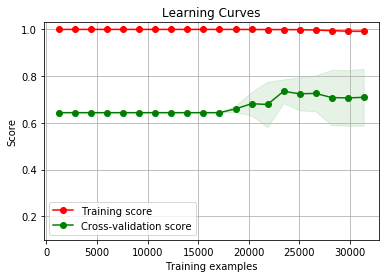

In [38]:
title = "Learning Curves"
myPlotLib.plot_learning_curve(clf, title, X_Data, Y_Data, ylim=(0.1, 1.03),train_sizes=splitsSize, cv=cv, n_jobs=4)
plt.show()


In [39]:
def myDT_LearningCurve(clf,X_Data,Y_Data,splits,cv):
    df = pd.DataFrame({"percent":[],"training_score":[],"cv_score":[]})
    for X in splits:
        X_train, X_test, y_train, y_test  = myLib.mySplitDataByTrainSize(X_Data,Y_Data,X,42)
        score,cv_scores,params = myDT(clf,X_train,y_train,X_test,y_test,cv)
        df = df.append(pd.DataFrame({"percent":X,"training_score":[score],"cv_score":[cv_scores.mean()]}),ignore_index=True)
    return df


In [40]:
learning_df= myDT_LearningCurve(clf,X_Data,Y_Data,splitsSize,cv)
learning_df

,percent,training_score,cv_score
0,0.04,1.000000,0.735879
1,0.09,1.000000,0.752615
2,0.14,0.997576,0.778256
3,0.19,0.999330,0.777005
4,0.24,0.998057,0.778453
5,0.29,0.997076,0.783754
6,0.34,0.996633,0.776758
7,0.39,0.996086,0.789173
8,0.44,0.995663,0.795974
9,0.49,0.995760,0.796295


In [41]:
learning_df.describe()

,percent,training_score,cv_score
count,20.000000,20.000000,20.000000
mean,0.515000,0.996059,0.799441
std,0.295804,0.002017,0.028517
min,0.040000,0.993589,0.735879
25%,0.277500,0.994678,0.778404
50%,0.515000,0.995476,0.797996
75%,0.752500,0.997201,0.823851
max,0.990000,1.000000,0.841785


Text(0.5, 1.0, 'Learning Curve of CV:10')

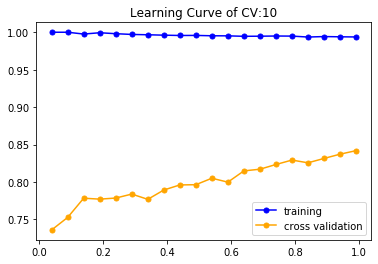

In [42]:

fig, ax = plt.subplots()
plt.plot(learning_df.percent, learning_df.training_score, color='blue', marker='o', markersize=5, label='training')

plt.plot(learning_df.percent, learning_df.cv_score, color='orange', marker='o', markersize=5, label='cross validation')

ax.legend()
ax.set_title("Learning Curve of CV:10")



####----------------------------------------------------------------
# Validation Curve
####----------------------------------------------------------------

In [43]:
depths = [1,2,4, 5, 8,10,15, 20,25,30,35,40,50,60,70,80,90,100,150,200]

In [44]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html#sklearn.model_selection.validation_curve
from sklearn.model_selection import validation_curve
train_scores, valid_scores = validation_curve(DecisionTreeClassifier(),X_train, y_train, 
    param_name="max_depth", param_range=depths,
    cv=cv, n_jobs=1)


In [45]:
train_scores

array([[0.76126084, 0.7623086 , 0.76122497, 0.76161312, 0.76095355,
        0.76133044, 0.76151889, 0.76217846, 0.761566  , 0.75949307],
       [0.78929514, 0.79005889, 0.79081272, 0.78945633, 0.78997456,
        0.79021012, 0.79086969, 0.79105814, 0.79025723, 0.7881843 ],
       [0.80785903, 0.80706714, 0.80805654, 0.80655799, 0.80599265,
        0.80731179, 0.80495619, 0.80669933, 0.80594554, 0.80439084],
       [0.81073313, 0.80881037, 0.80923439, 0.80924338, 0.80900782,
        0.81027985, 0.80641666, 0.80919627, 0.80848959, 0.80759446],
       [0.82755371, 0.82704358, 0.82657244, 0.82582682, 0.82625082,
        0.82912466, 0.82219919, 0.82719307, 0.82450768, 0.82709884],
       [0.84762533, 0.84588928, 0.84645465, 0.84542542, 0.84509564,
        0.84971262, 0.83996043, 0.84509564, 0.84551965, 0.84575521],
       [0.9030343 , 0.90035336, 0.90699647, 0.89960426, 0.90313766,
        0.90144163, 0.89060586, 0.89776689, 0.89442194, 0.89908603],
       [0.94609876, 0.95001178, 0.9537338

In [46]:
valid_scores


array([[0.76016949, 0.75074184, 0.76049173, 0.75699746, 0.76293469,
        0.75954198, 0.77184054, 0.7519084 , 0.75742154, 0.77608142],
       [0.79237288, 0.78550233, 0.78126325, 0.79092451, 0.78880407,
        0.7841391 , 0.79177269, 0.77905004, 0.78625954, 0.80322307],
       [0.80550847, 0.7990674 , 0.80076304, 0.80322307, 0.80364716,
        0.80237489, 0.81552163, 0.79728584, 0.80364716, 0.80746395],
       [0.80805085, 0.80161085, 0.79991522, 0.80661578, 0.80407125,
        0.80703986, 0.81509754, 0.80195081, 0.80958439, 0.80110263],
       [0.82033898, 0.8041543 , 0.80796948, 0.81509754, 0.81212892,
        0.81806616, 0.81849025, 0.80449534, 0.82103478, 0.81721798],
       [0.82118644, 0.80712166, 0.80500212, 0.82315522, 0.81679389,
        0.82273113, 0.82909245, 0.80831213, 0.82273113, 0.82485157],
       [0.84322034, 0.8342518 , 0.81348029, 0.84054283, 0.83163698,
        0.84139101, 0.83884648, 0.82145886, 0.8307888 , 0.8273961 ],
       [0.85      , 0.84272997, 0.8346757

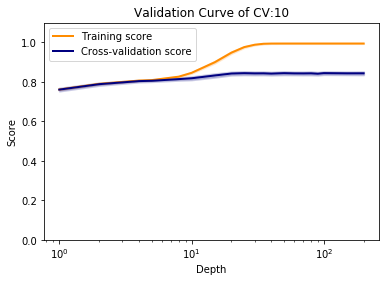

In [47]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt.title("Validation Curve of CV:10")
plt.xlabel("Depth")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(depths, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(depths, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(depths, valid_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(depths, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()


####----------------------------------------------------------------
# Model Turning
####----------------------------------------------------------------

In [48]:
learnig_df= myDT_ModelTurning(clf,depths,X_train,y_train,X_test,y_test,cv)
learnig_df

,depth,training_score,cv_score
0,1.0,0.761152,0.760813
1,2.0,0.789858,0.788331
2,4.0,0.805758,0.803850
3,5.0,0.808302,0.805546
4,8.0,0.824669,0.813815
5,10.0,0.844428,0.818522
6,15.0,0.897346,0.832047
7,20.0,0.942503,0.840782
8,25.0,0.971549,0.843368
9,30.0,0.988382,0.843580


In [49]:
learnig_df.describe()

,depth,training_score,cv_score
count,20.000000,20.000000,20.000000
mean,49.750000,0.928388,0.829550
std,53.155061,0.086843,0.023673
min,1.000000,0.761152,0.760813
25%,9.500000,0.839489,0.817345
50%,32.500000,0.990332,0.843623
75%,72.500000,0.993513,0.844004
max,200.000000,0.993513,0.844640


Text(0.5, 1.0, 'Training and Cross validation scores of CV:10')

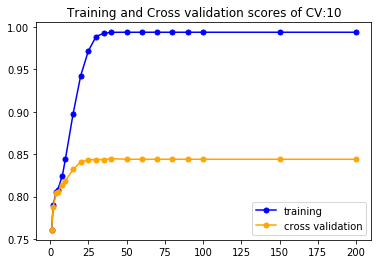

In [50]:

fig, ax = plt.subplots()
plt.plot(learnig_df.depth, learnig_df.training_score, color='blue', marker='o', markersize=5, label='training')

plt.plot(learnig_df.depth, learnig_df.cv_score, color='orange', marker='o', markersize=5, label='cross validation')

ax.legend()
ax.set_title("Training and Cross validation scores of CV:10")


<div class="alert alert-block alert-info">
Based on the plot, we saw that 
</div>


####----------------------------------------------------------------
# Grid Search CV
####----------------------------------------------------------------

In [51]:
#GridSearchCV
def myGS(X_train,y_train,depths,num_leafs):
    from sklearn.model_selection import GridSearchCV
    
    param_grid = [{'max_depth':depths,
                  'min_samples_leaf':num_leafs}]
    clf2 = DecisionTreeClassifier(random_state=0)
    gs = GridSearchCV(estimator=clf2, param_grid=param_grid, cv=10)
    
    gs = gs.fit(X_train, y_train)
    return gs
    

In [52]:
depths = range(10,50,20)
num_leafs = range(1,10,10)
gs = myGS(X_train,y_train,depths,num_leafs)
#Training Score
gs.best_score_

0.8435803934871099

In [53]:
gs.best_params_
    

{'max_depth': 30, 'min_samples_leaf': 1}

####----------------------------------------------------------------
# Final Evaluation
####----------------------------------------------------------------

In [54]:
clf = DecisionTreeClassifier(random_state=0,max_depth=gs.best_params_['max_depth'],min_samples_leaf=gs.best_params_['min_samples_leaf'])
#Original Data
score,cv_scores,params = myDT(clf,X_train,y_train,X_test,y_test,cv)
score

0.9883819538670285

In [55]:
cv_scores.mean()

0.8435801908906105

In [56]:
params


[3556, 30]